<a href="https://colab.research.google.com/github/Susreesha/ML/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/heart_attack_prediction_dataset_edit.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8761 non-null   float64
 2   Sex                              8762 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8762 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8762 non-null   float64
 7   Family History                   8762 non-null   float64
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
df = df.drop_duplicates('Patient ID')

In [ ]:
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67.0,m,208,158/88,72,0.0,0.0,1,0,...,6.615001,261404.0,31.251233,286,0,6.0,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21.0,male,389,165/93,98,1.0,1.0,1,1,...,4.963459,285768.0,27.194973,235,1,7.0,Canada,North America,Northern Hemisphere,0
2,BNI9906,21.0,Female,324,174/99,72,1.0,0.0,0,0,...,9.463426,235282.0,28.176571,587,4,4.0,France,Europe,Northern Hemisphere,0
3,JLN3497,84.0,NaN,383,163/100,73,1.0,1.0,1,0,...,7.648981,125640.0,36.464704,378,3,4.0,Canada,North America,Northern Hemisphere,0
4,GFO8847,66.0,Male,318,91/88,93,NaN,1.0,1,1,...,1.514821,160555.0,21.809144,231,1,5.0,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60.0,Male,121,94/76,61,1.0,1.0,1,0,...,10.806373,235420.0,19.655895,67,7,7.0,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28.0,Female,120,157/102,73,1.0,0.0,0,1,...,3.833038,217881.0,23.993866,617,4,9.0,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47.0,Male,250,161/75,105,0.0,1.0,1,1,...,2.375214,36998.0,35.406146,527,4,4.0,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36.0,Male,178,119/67,60,1.0,0.0,1,0,...,0.029104,209943.0,27.294020,114,2,8.0,Brazil,South America,Southern Hemisphere,0


In [ ]:
try:
    df[['Systolic_Blood_Pressure', 'Diastolic_Blood_Pressure']] = df['Blood Pressure'].str.split('/', expand=True)
    df['Systolic_Blood_Pressure'] = pd.to_numeric(df['Systolic_Blood_Pressure'], errors='coerce')
    df['Diastolic_Blood_Pressure'] = pd.to_numeric(df['Diastolic_Blood_Pressure'], errors='coerce')

    print(df.head())
except:
    print("Error: 'Blood Pressure' column not found or data format is incorrect.")

  Patient ID   Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812  67.0       m          208         158/88          72       0.0   
1    CZE1114  21.0    male          389         165/93          98       1.0   
2    BNI9906  21.0  Female          324         174/99          72       1.0   
3    JLN3497  84.0     NaN          383        163/100          73       1.0   
4    GFO8847  66.0    Male          318          91/88          93       NaN   

   Family History  Smoking  Obesity  ...        BMI  Triglycerides  \
0             0.0        1        0  ...  31.251233            286   
1             1.0        1        1  ...  27.194973            235   
2             0.0        0        0  ...  28.176571            587   
3             1.0        1        0  ...  36.464704            378   
4             1.0        1        1  ...  21.809144            231   

  Physical Activity Days Per Week  Sleep Hours Per Day    Country  \
0                            

In [ ]:
df = df.drop(columns=['Patient ID', 'Blood Pressure', 'Country'])

In [ ]:
df = df.rename(columns={'Heart Rate':'Heart_Rate', 'Family History':'Family_History',
                        'Physical Activity Days Per Week':'Physical_Activity_Days_Per_Week', 'Sleep Hours Per Day':'Sleep_Hours_Per_Day',
                        'Heart Attack Risk':'Heart_Attack_Risk', 'Alcohol Consumption':'Alcohol_Consumption',
                        'Exercise Hours Per Week':'Exercise_Hours_Per_Week', 'Previous Heart Problems':'Previous_Heart_Problems',
                        'Medication Use':'Medication_Use', 'Stress Level':'Stress_Level', 'Sedentary Hours Per Day':'Sedentary Hours Per Day'})

In [ ]:
df.head()

,Age,Sex,Cholesterol,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Alcohol_Consumption,Exercise_Hours_Per_Week,...,Income,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Continent,Hemisphere,Heart_Attack_Risk,Systolic_Blood_Pressure,Diastolic_Blood_Pressure
0,67.0,m,208,72,0.0,0.0,1,0,0,4.168189,...,261404.0,31.251233,286,0,6.0,South America,Southern Hemisphere,0,158.0,88.0
1,21.0,male,389,98,1.0,1.0,1,1,1,1.813242,...,285768.0,27.194973,235,1,7.0,North America,Northern Hemisphere,0,165.0,93.0
2,21.0,Female,324,72,1.0,0.0,0,0,0,2.078353,...,235282.0,28.176571,587,4,4.0,Europe,Northern Hemisphere,0,174.0,99.0
3,84.0,NaN,383,73,1.0,1.0,1,0,1,9.828130,...,125640.0,36.464704,378,3,4.0,North America,Northern Hemisphere,0,163.0,100.0
4,66.0,Male,318,93,NaN,1.0,1,1,0,5.804299,...,160555.0,21.809144,231,1,5.0,Asia,Northern Hemisphere,0,91.0,88.0


In [ ]:
df.dtypes

,0
Age,float64
Sex,object
Cholesterol,int64
Heart_Rate,int64
Diabetes,float64
Family_History,float64
Smoking,int64
Obesity,int64
Alcohol_Consumption,int64
Exercise_Hours_Per_Week,float64


In [ ]:
for i in df.columns:
 print(df[i].unique())

[ 67.  21.  84.  66.  nan  90.  20.  43. 400.  71.  77.  60.  88.  73.
  69.  38.  45.  50.  36.  48.  40.  79.  63.  27.  25.  86.  42.  52.
  29.  30.  47.  44.  33.  51.  70.  85.  31.  56.  24.  54.  74.  72.
  55.  26.  53.  46.  57.  22.  35.  39.  80.  65.  83.  82.  28.  19.
  75.  18.  34.  37.  89.  32.  49.  23.  59.  62.  64.  61.  76.  41.
  87.  81.  58.  78.  68.]
['m' 'male' 'Female' nan 'Male' 'f']
[208 389 324 383 318 297 358 220 145 248 373 374 228 259 122 379 166 303
 340 294 359 202 133 159 271 273 328 154 135 197 321 375 360 263 201 347
 129 229 251 121 190 185 279 336 192 180 203 368 222 243 218 120 285 377
 369 311 139 266 153 339 329 333 398 124 183 163 362 390 200 396 255 209
 247 250 227 246 223 330 195 194 178 155 240 237 216 276 224 326 198 301
 314 304 334 213 254 230 316 277 388 206 384 205 261 308 338 382 291 168
 171 378 253 245 226 281 123 173 231 234 268 306 186 293 161 380 239 149
 320 219 335 265 126 307 270 225 193 148 296 136 364 353 252 232 387 2

In [ ]:
import numpy as np
for I in ["Age","BMI","Cholesterol","Heart Rate","Systolic_Blood Pressure","Diastolic_Blood Pressure"]:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [ ]:
df.isnull().sum()

,0
Age,2
Sex,1
Cholesterol,0
Heart_Rate,0
Diabetes,1
Family_History,1
Smoking,0
Obesity,0
Alcohol_Consumption,0
Exercise_Hours_Per_Week,0


In [ ]:
for i in ['Sex', 'Diabetes', 'Family_History']:
  df[i].fillna(df[i].mode()[0], inplace=True)

<ipython-input-242-4353dafb013e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


In [ ]:
for i in ['Age', 'Sedentary Hours Per Day', 'Sleep_Hours_Per_Day']:
  df[i].fillna(df[i].mean(), inplace=True)

<ipython-input-243-29ff27bb66f0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace=True)


In [ ]:
df['Diet'] = df['Diet'].replace({'Unhelthy': 'Unhealthy','Healty': 'Healthy'})

In [ ]:
df['Sex'] = df['Sex'].replace({'m': 'Male','male': 'Male', 'f':'Female'})

In [ ]:
df = pd.get_dummies(df,columns=['Sex', 'Diet', 'Continent', 'Hemisphere'])

In [ ]:
df

,Age,Cholesterol,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Alcohol_Consumption,Exercise_Hours_Per_Week,Previous_Heart_Problems,...,Diet_Healthy,Diet_Unhealthy,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere
0,67.0,208,72,0.0,0.0,1,0,0,4.168189,0,...,False,False,False,False,False,False,False,True,False,True
1,21.0,389,98,1.0,1.0,1,1,1,1.813242,1,...,False,True,False,False,False,False,True,False,True,False
2,21.0,324,72,1.0,0.0,0,0,0,2.078353,1,...,True,False,False,False,False,True,False,False,True,False
3,84.0,383,73,1.0,1.0,1,0,1,9.828130,1,...,False,False,False,False,False,False,True,False,True,False
4,66.0,318,93,1.0,1.0,1,1,0,5.804299,1,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60.0,121,61,1.0,1.0,1,0,1,7.917342,1,...,True,False,False,True,False,False,False,False,True,False
8759,28.0,120,73,1.0,0.0,0,1,0,16.558426,0,...,True,False,False,False,False,False,True,False,True,False
8760,47.0,250,105,0.0,1.0,1,1,1,3.148438,1,...,False,False,False,False,False,False,False,True,False,True
8761,36.0,178,60,1.0,0.0,1,0,0,3.789950,1,...,False,True,False,False,False,False,False,True,False,True


In [ ]:
min_max_values = {}

for i in df.select_dtypes(include = np.number).columns:
  min_value = df[i].min()
  max_value = df[i].max()
  df[i] = (df[i] - min_value) / (max_value - min_value)
  min_max_values[i] = (min_value, max_value)

In [ ]:
min_max_values

{'Age': (18.0, 400.0),
 'Cholesterol': (120, 400),
 'Heart_Rate': (40, 110),
 'Diabetes': (0.0, 1.0),
 'Family_History': (0.0, 1.0),
 'Smoking': (0, 1),
 'Obesity': (0, 1),
 'Alcohol_Consumption': (0, 1),
 'Exercise_Hours_Per_Week': (0.002442348, 19.99870905),
 'Previous_Heart_Problems': (0, 1),
 'Medication_Use': (0, 1),
 'Stress_Level': (1, 10),
 'Sedentary Hours Per Day': (0.001263206, 11.99931341),
 'Income': (20062.0, 299954.0),
 'BMI': (18.00233658, 160.0),
 'Triglycerides': (30, 800),
 'Physical_Activity_Days_Per_Week': (0, 7),
 'Sleep_Hours_Per_Day': (4.0, 10.0),
 'Heart_Attack_Risk': (0, 1),
 'Systolic_Blood_Pressure': (90.0, 180.0),
 'Diastolic_Blood_Pressure': (60.0, 110.0)}

In [ ]:
import json
with open('min_max_values.json', 'w') as json_file:
  json.dump(min_max_values, json_file)

In [ ]:
df.head()

,Age,Cholesterol,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Alcohol_Consumption,Exercise_Hours_Per_Week,Previous_Heart_Problems,...,Diet_Healthy,Diet_Unhealthy,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere
0,0.128272,0.314286,0.457143,0.0,0.0,1.0,0.0,0.0,0.208326,0.0,...,False,False,False,False,False,False,False,True,False,True
1,0.007853,0.960714,0.828571,1.0,1.0,1.0,1.0,1.0,0.090557,1.0,...,False,True,False,False,False,False,True,False,True,False
2,0.007853,0.728571,0.457143,1.0,0.0,0.0,0.0,0.0,0.103815,1.0,...,True,False,False,False,False,True,False,False,True,False
3,0.172775,0.939286,0.471429,1.0,1.0,1.0,0.0,1.0,0.491376,1.0,...,False,False,False,False,False,False,True,False,True,False
4,0.125654,0.707143,0.757143,1.0,1.0,1.0,1.0,0.0,0.290147,1.0,...,False,True,False,True,False,False,False,False,True,False


In [ ]:
df.corr()

,Age,Cholesterol,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Alcohol_Consumption,Exercise_Hours_Per_Week,Previous_Heart_Problems,...,Diet_Healthy,Diet_Unhealthy,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere
Age,1.000000,-0.006797,-0.001968,-0.012492,0.009723,0.389769,-0.009598,-0.005353,0.003428,0.002442,...,-0.015203,0.007393,0.021692,-0.000036,-0.004720,-0.013258,0.011689,-0.007600,0.000189,-0.000189
Cholesterol,-0.006797,1.000000,0.000260,-0.013311,-0.021769,0.016399,-0.014683,-0.007460,0.021714,-0.006232,...,-0.010462,0.008190,-0.008461,0.002681,-0.015232,0.004034,0.011507,0.001992,0.019247,-0.019247
Heart_Rate,-0.001968,0.000260,1.000000,0.006792,-0.013620,-0.012318,0.012765,0.003411,0.008323,-0.004995,...,-0.012911,-0.007748,0.008202,-0.011345,0.013205,-0.004944,-0.003236,0.005066,-0.010199,0.010199
Diabetes,-0.012492,-0.013311,0.006792,1.000000,-0.013929,0.000498,0.012784,0.005654,-0.007113,0.000949,...,0.006255,-0.004409,-0.002731,0.004927,-0.013198,0.010058,0.008108,-0.011717,-0.001366,0.001366
Family_History,0.009723,-0.021769,-0.013620,-0.013929,1.000000,0.011710,-0.001103,0.012379,-0.006523,-0.004910,...,0.005283,0.008233,-0.001008,0.000249,-0.001322,-0.017603,0.024619,0.002603,0.003843,-0.003843
Smoking,0.389769,0.016399,-0.012318,0.000498,0.011710,1.000000,0.003931,0.012802,-0.000196,-0.000536,...,-0.000483,-0.010954,0.012614,0.002785,-0.003482,0.004481,-0.009170,-0.008889,-0.002387,0.002387
Obesity,-0.009598,-0.014683,0.012765,0.012784,-0.001103,0.003931,1.000000,-0.024060,0.001964,0.005273,...,-0.000509,-0.007019,0.002518,-0.004015,-0.000160,0.000225,0.005234,-0.001490,0.008710,-0.008710
Alcohol_Consumption,-0.005353,-0.007460,0.003411,0.005654,0.012379,0.012802,-0.024060,1.000000,-0.008351,0.010259,...,0.005647,-0.003592,-0.001699,0.004053,-0.017596,-0.000777,0.011416,0.002517,0.011909,-0.011909
Exercise_Hours_Per_Week,0.003428,0.021714,0.008323,-0.007113,-0.006523,-0.000196,0.001964,-0.008351,1.000000,0.005387,...,0.010450,-0.002816,0.011530,-0.005546,-0.008471,0.004470,0.005310,-0.005288,0.007670,-0.007670
Previous_Heart_Problems,0.002442,-0.006232,-0.004995,0.000949,-0.004910,-0.000536,0.005273,0.010259,0.005387,1.000000,...,0.015039,-0.019235,-0.012890,-0.022658,0.022458,0.001417,0.014219,0.006990,-0.017539,0.017539


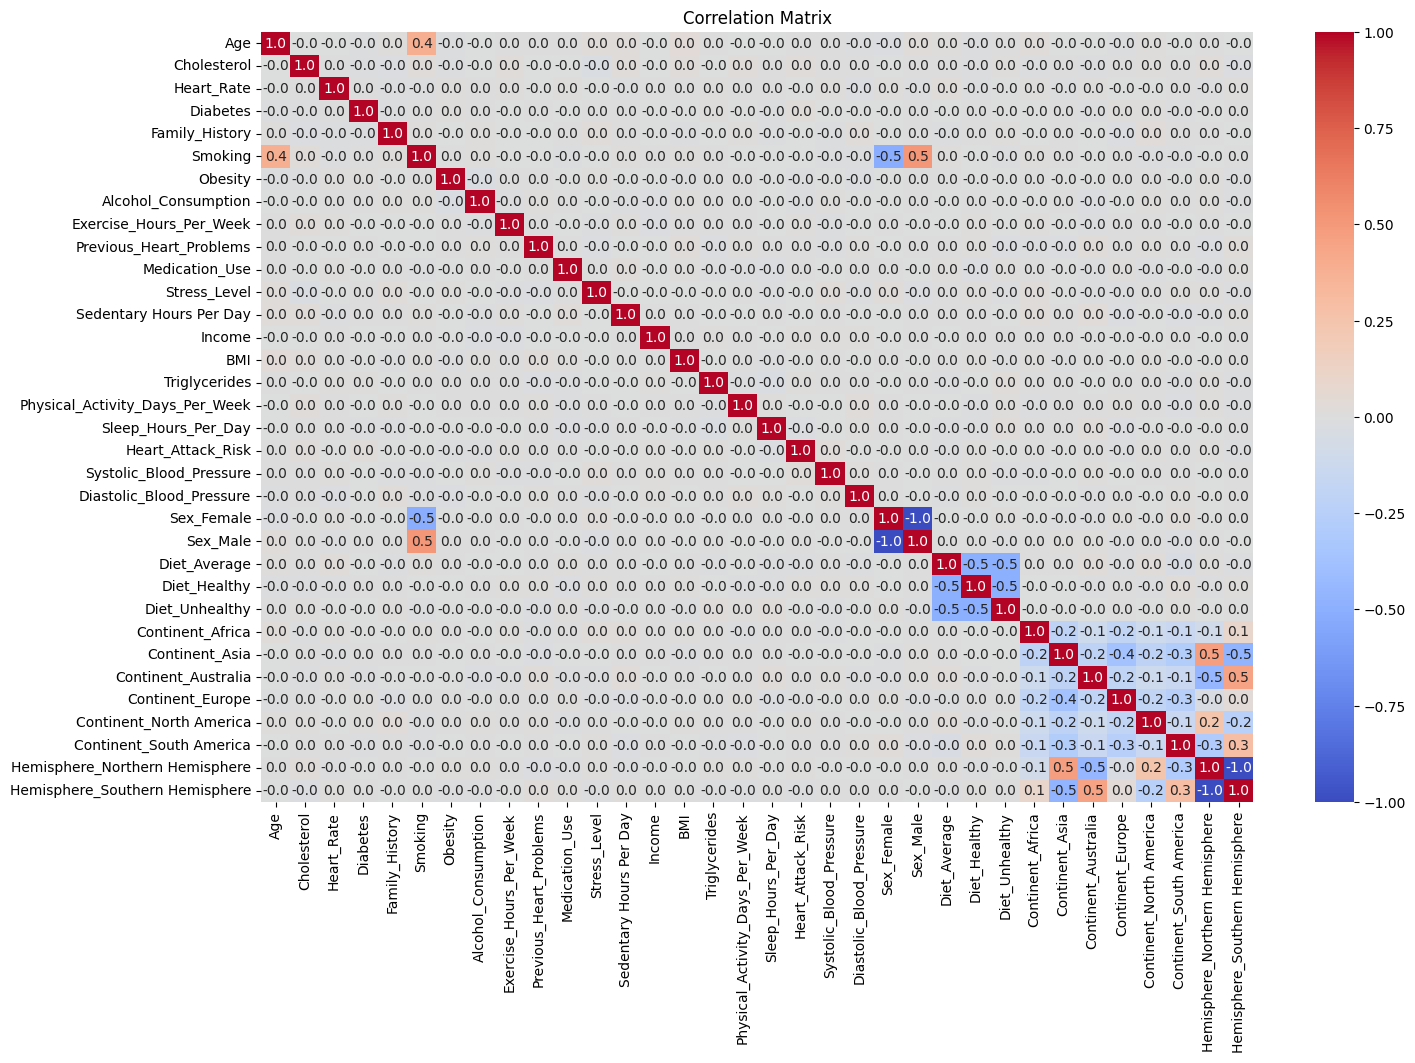

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
Correlation_matrix = df.corr()
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm',fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = df.drop(columns = ['Heart_Attack_Risk', 'Sex_Male', 'Diet_Average', 'Diet_Unhealthy', 'Continent_Africa', 'Continent_Australia', 'Continent_Europe',
                       'Continent_North America', 'Continent_South America', 'Hemisphere_Southern Hemisphere'], axis = 1)
y = df['Heart_Attack_Risk']

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split dataset into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(15, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    keras.layers.Dense(8, activation='relu'),  # Hidden Layer 1
    keras.layers.Dense(4, activation='relu'),  # Hidden Layer 2
    keras.layers.Dense(1, activation='sigmoid')  # Output Layer (for binary classification)
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary values

# Print sample predictions
print("Sample Predictions:\n", predictions[:10])


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5822 - loss: 0.6809 - val_accuracy: 0.6448 - val_loss: 0.6498
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6433 - loss: 0.6524 - val_accuracy: 0.6448 - val_loss: 0.6499
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6432 - loss: 0.6526 - val_accuracy: 0.6448 - val_loss: 0.6496
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6485 - loss: 0.6492 - val_accuracy: 0.6448 - val_loss: 0.6496
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6546 - loss: 0.6445 - val_accuracy: 0.6448 - val_loss: 0.6498
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6409 - loss: 0.6523 - val_accuracy: 0.6448 - val_loss: 0.6494
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6356 - loss: 0.6552 - val_accuracy: 0.6448 - val_loss: 0.6501
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6491 - loss: 0.6466 - val_accuracy: 0.6448 - val_

In [ ]:
y.value_counts()

,count
Heart_Attack_Risk,
0.0,5623
1.0,3139


In [ ]:
x.columns

Index(['Age', 'Cholesterol', 'Heart_Rate', 'Diabetes', 'Family_History',
       'Smoking', 'Obesity', 'Alcohol_Consumption', 'Exercise_Hours_Per_Week',
       'Previous_Heart_Problems', 'Medication_Use', 'Stress_Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical_Activity_Days_Per_Week', 'Sleep_Hours_Per_Day',
       'Systolic_Blood_Pressure', 'Diastolic_Blood_Pressure', 'Sex_Female',
       'Diet_Healthy', 'Continent_Asia', 'Hemisphere_Northern Hemisphere'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
y_train.value_counts()

,count
Heart_Attack_Risk,
0.0,4494
1.0,2515


In [ ]:
# prompt: smote for xtrain

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)


In [ ]:
y_train.value_counts()

,count
Heart_Attack_Risk,
0.0,4494
1.0,2515


In [ ]:
# prompt: logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(x_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix


Accuracy: 0.5019965772960638
              precision    recall  f1-score   support

         0.0       0.64      0.53      0.58      1129
         1.0       0.35      0.46      0.40       624

    accuracy                           0.50      1753
   macro avg       0.49      0.49      0.49      1753
weighted avg       0.53      0.50      0.51      1753

Confusion Matrix:


array([[594, 535],
       [338, 286]])

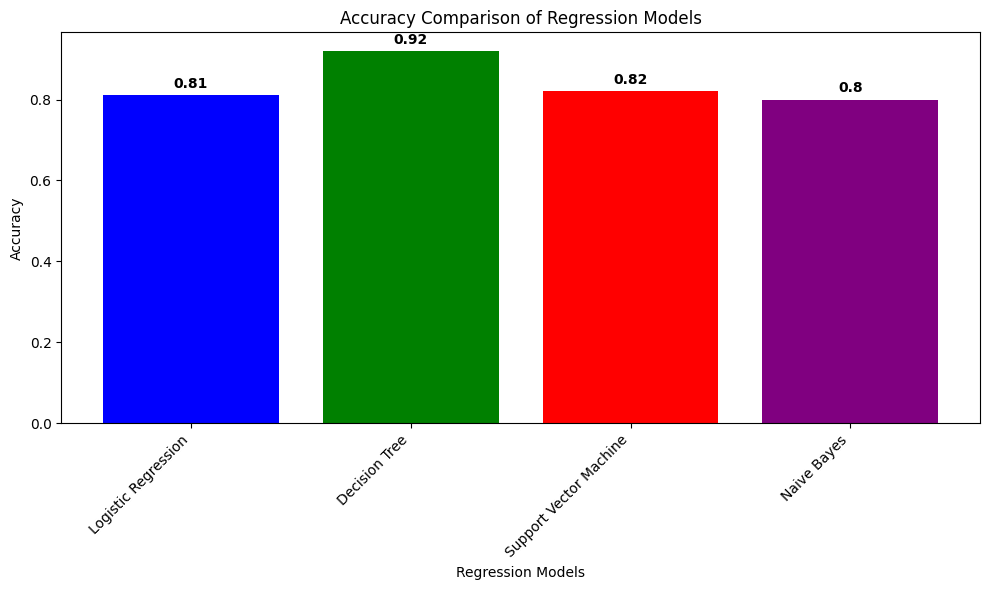

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Naive Bayes']
accuracy_scores = [0.81, 0.92, 0.82, 0.80]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'purple'])

plt.xlabel('Regression Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Regression Models')
plt.xticks(rotation=45, ha='right')

# Add text labels for accuracy
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, str(v), ha='center', va='bottom', fontweight='bold') # Adjust position as needed

plt.tight_layout()
plt.show()

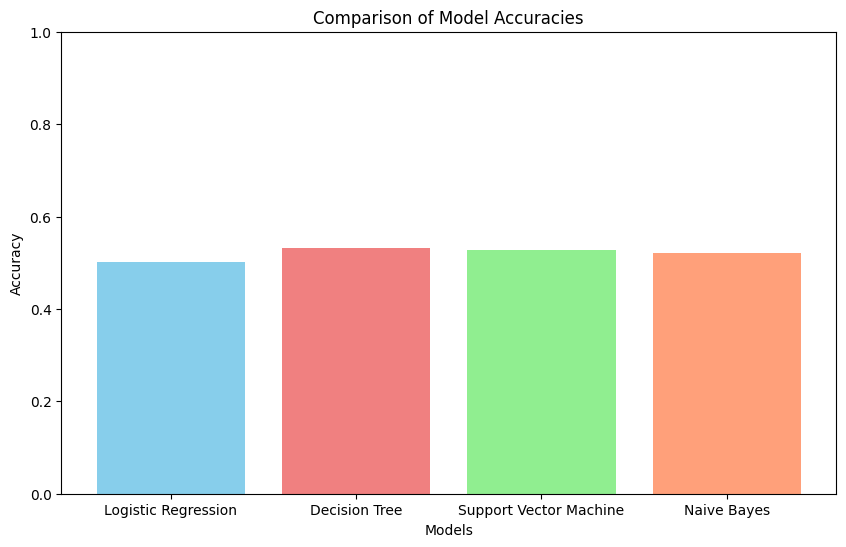

In [ ]:
# prompt: # prompt: generate  code for 'Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Naive Bayes' for getting comparision graph for every model.
# import matplotlib.pyplot as plt
# # Assuming 'models' is defined as in the previous code
# model_names = []
# accuracies = []
# for model_name, model in models:
#     model_names.append(model_name)
#     model.fit(x_train_smote, y_train_smote)
#     y_pred = model.predict(x_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracies.append(accuracy)
# # Create the comparison graph
# plt.figure(figsize=(10, 6))
# plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
# plt.xlabel("Models")
# plt.ylabel("Accuracy")
# plt.title("Comparison of Model Accuracies")
# plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
# plt.show()

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=0)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Create a list of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC()),
    ('Naive Bayes', GaussianNB())
]

model_names = []
accuracies = []
for model_name, model in models:
    model_names.append(model_name)
    model.fit(x_train_smote, y_train_smote)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Create the comparison graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()


In [ ]:
# prompt: random forest

from sklearn.ensemble import RandomForestClassifier


# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=0)  # You can adjust hyperparameters here
rf_model.fit(x_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_rf = rf_model.predict(x_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
conf_matrix_rf


Random Forest Accuracy: 0.5978322875071307
              precision    recall  f1-score   support

         0.0       0.64      0.84      0.73      1129
         1.0       0.35      0.16      0.22       624

    accuracy                           0.60      1753
   macro avg       0.50      0.50      0.47      1753
weighted avg       0.54      0.60      0.55      1753

Random Forest Confusion Matrix:


array([[949, 180],
       [525,  99]])

In [ ]:
df.columns

Index(['Age', 'Cholesterol', 'Heart_Rate', 'Diabetes', 'Family_History',
       'Smoking', 'Obesity', 'Alcohol_Consumption', 'Exercise_Hours_Per_Week',
       'Previous_Heart_Problems', 'Medication_Use', 'Stress_Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical_Activity_Days_Per_Week', 'Sleep_Hours_Per_Day',
       'Heart_Attack_Risk', 'Systolic_Blood_Pressure',
       'Diastolic_Blood_Pressure', 'Sex_Female', 'Sex_Male', 'Diet_Average',
       'Diet_Healthy', 'Diet_Unhealthy', 'Continent_Africa', 'Continent_Asia',
       'Continent_Australia', 'Continent_Europe', 'Continent_North America',
       'Continent_South America', 'Hemisphere_Northern Hemisphere',
       'Hemisphere_Southern Hemisphere'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8762 entries, 0 to 8762
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8762 non-null   float64
 1   Cholesterol                      8762 non-null   float64
 2   Heart_Rate                       8762 non-null   float64
 3   Diabetes                         8762 non-null   float64
 4   Family_History                   8762 non-null   float64
 5   Smoking                          8762 non-null   float64
 6   Obesity                          8762 non-null   float64
 7   Alcohol_Consumption              8762 non-null   float64
 8   Exercise_Hours_Per_Week          8762 non-null   float64
 9   Previous_Heart_Problems          8762 non-null   float64
 10  Medication_Use                   8762 non-null   float64
 11  Stress_Level                     8762 non-null   float64
 12  Sedentary Hours Per Day  

In [ ]:
streamlit_code = """
import streamlit as st
import joblib
import numpy as np
import json

#Load the trained model
model = joblib.load('logistic_regression_model.pk1')

#Streamlit App
st.title("Heart Attack Risk Prediction")
st.write("Enter the input values for prediction.")

#Input fields for each feature
Age = st.number_input("Age", min_value=18, max_value=114, step=1, value=65)
Cholesterol = st.number_input("Cholesterol", min_value=18, max_value=114, step=1, value=65)
BMI = st.number_input("BMI", min_value=15.0, max_value=50.0, step=0.1, value=25.0)
Length_of_Surgery = st.number_input("Length of Surgery", min_value=1.0, max_value=15.0, step=1.0, value=5.0)
Blood_Pressure_Systolic = st.number_input("Blood Pressure Systolic", min_value=90.0, max_value=160.0, step=1.0, value=110.0)
Blood_Pressure_Diastolic = st.number_input("Blood Pressure Diastolic", min_value=60.0, max_value=110.0, step=1.0, value=80.0)
Hemoglobin_Level = st.number_input("Hemoglobin Level", min_value=8.0, max_value=190.0, step=0.1, value=10.0)

#Yes or No
Smoking_Status_No = st.selectbox("Smoker?", options=["No", "Yes"])== "No"

#Categorical fields
Gender_Female = st.selectbox("Gender", options=["Male", "Female"]) == "Female"

#Type of Surgery Selection
Type_of_Surgery = st.selectbox("Type of Surgery", options=["Gastrointestinal", "Orthopedic", "Neurological", "Urologic", "Cardiac"])
Type_of_Surgery_Cardiac = Type_of_Surgery == 'Cardiac'
Type_of_Surgery_Gastrointestinal = Type_of_Surgery == 'Gastrointestinal'
Type_of_Surgery_Neurological = Type_of_Surgery == 'Neurological'
Type_of_Surgery_Orthopedic = Type_of_Surgery == 'Orthopedic'
Type_of_Surgery_Urologic = Type_of_Surgery == 'Urologic'

#Normalization function
def min_max_scale(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

#Load Min-Max values from JSON
with open('min_max_values.json', 'r') as json_file:
    min_max_values = json.load(json_file)

#Normalize inputs
Age_norm = min_max_scale(Age, *min_max_values['Age'])
BMI_norm = min_max_scale(BMI, *min_max_values['BMI'])
Length_of_Surgery_norm = min_max_scale(Length_of_Surgery, *min_max_values['Length_of_Surgery'])
Blood_Pressure_Systolic_norm = min_max_scale(Blood_Pressure_Systolic, *min_max_values['Blood_Pressure_Systolic'])
Blood_Pressure_Diastolic_norm = min_max_scale(Blood_Pressure_Diastolic, *min_max_values['Blood_Pressure_Diastolic'])
Hemoglobin_Level_norm = min_max_scale(Hemoglobin_Level, *min_max_values['Hemoglobin_Level'])

#Prepare input data for prediction
input_data = np.array([
  Age_norm, BMI_norm, Length_of_Surgery_norm, Blood_Pressure_Systolic_norm, Blood_Pressure_Diastolic_norm, Hemoglobin_Level_norm, int(Smoking_Status_No),
  int(Gender_Female),int(Type_of_Surgery_Cardiac), int(Type_of_Surgery_Gastrointestinal), int(Type_of_Surgery_Neurological), int(Type_of_Surgery_Orthopedic), int(Type_of_Surgery_Urologic)
]).reshape(1, -1)

#Predict button
if st.button("Recovery Time"):
 prediction = model.predict(input_data)
 st.success(f"Recovery Time: {prediction[0]:,.2f}")

"""

#Save the code to a file
with open ('app.py', 'w') as f:
  f.write(streamlit_code)

**ANN**